## Hands on Machine Learning

### Chapter 2

In [171]:
# Get the Data
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [172]:
fetch_housing_data()

In [173]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [174]:
housing = load_housing_data()

In [175]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [176]:
housing.info() # bedrooms has nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [178]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [179]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


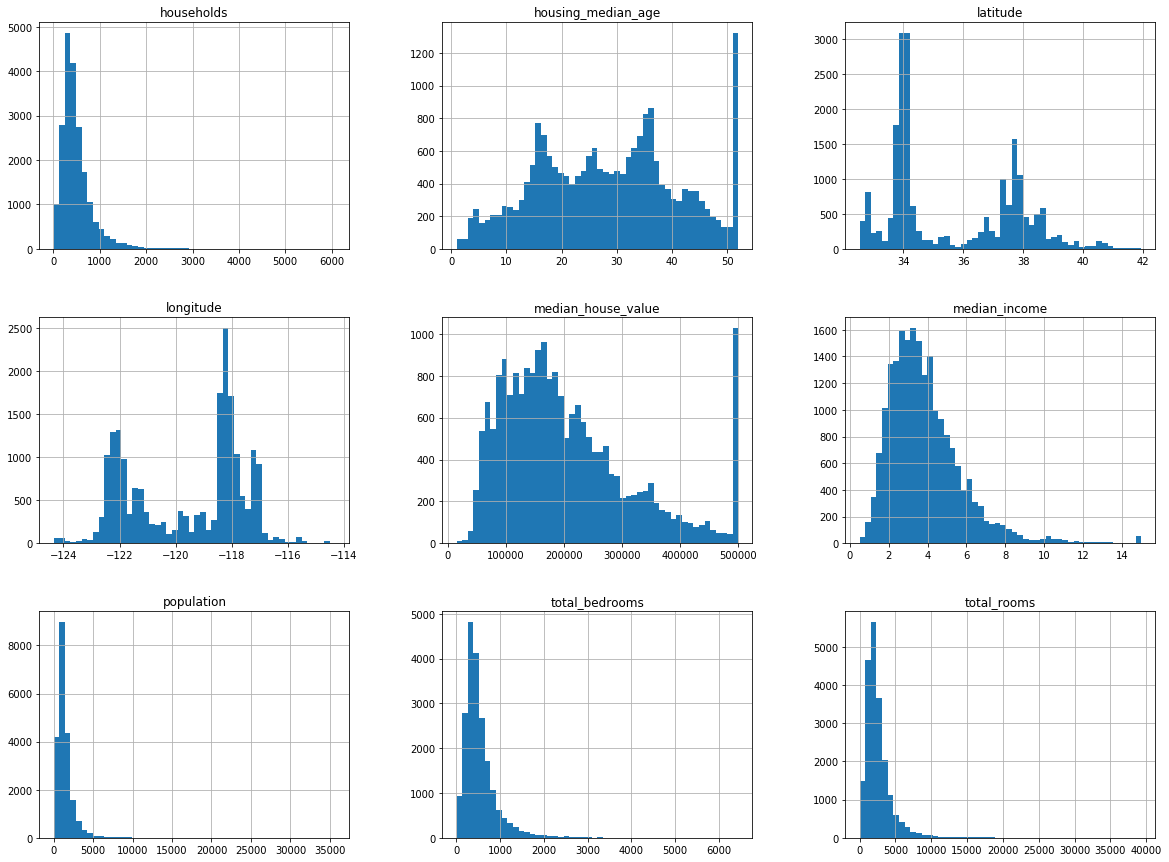

In [182]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [183]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [189]:
# create a test set
import numpy as np
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [190]:
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [191]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


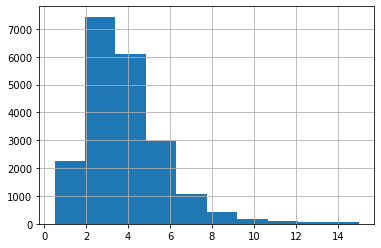

In [192]:
housing['median_income'].hist()

In [202]:
housing["income_cat"] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['inc_cat'] < 5, 5.0, inplace=True)

In [203]:
housing['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

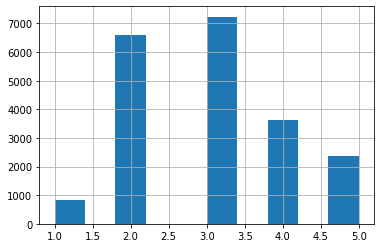

In [204]:
housing['income_cat'].hist()

In [207]:
from sklearn.model_selection import StratifiedShuffleSplit

In [208]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [212]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [213]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,inc_cat,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4.0,4.0
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2.0,2.0
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3.0,3.0
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3.0,3.0


In [218]:
# check test and full data set proportions of income_cat
# startified sampling has income cateogiry proportions nearly identical to the full dataset
# set set generated by pure random samplling is skewed to the full dataset
print(strat_test_set['income_cat'].value_counts() / len(strat_test_set))
print(housing['income_cat'].value_counts() / len(housing))

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64


In [219]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop(['income_cat', 'inc_cat'], axis=1, inplace=True)

In [220]:
set_

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND


#### Discover and visualize the data

In [226]:
housing = strat_train_set.copy() #copy train set so we do not harm the original

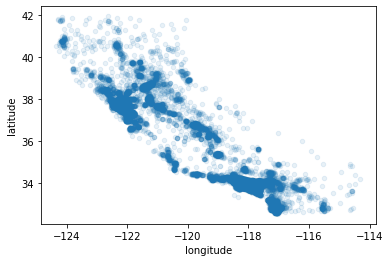

In [229]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1) # alpha parameter gives density
# plot shows California

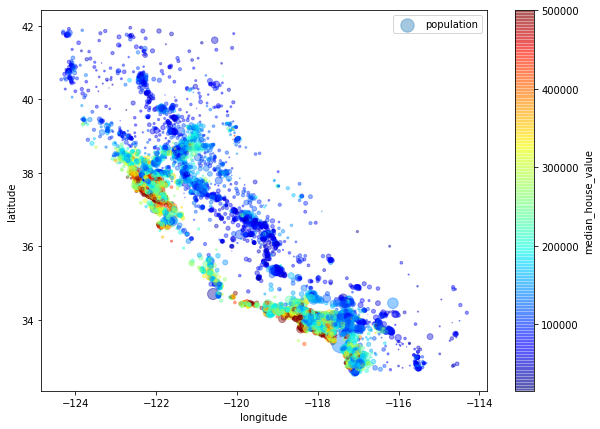

In [235]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap("jet"), colorbar=True,
            sharex=False)

In [237]:
corr_matrix = housing.corr()

In [238]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

## Chapter 4

Linear Regression model - you need to find the value of $\theta$  that minimizes the RMSE. It is simpler to minimize the MSE

Normal Equation - finds the value of $\theta$ that minimizes the cost function

Normal Equation: $$\theta_hat =
$$X^T . X)^-1$$

In [151]:
import numpy as np
import matplotlib.pyplot as plt

In [152]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

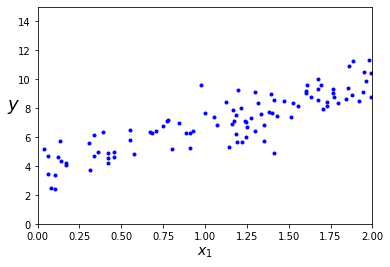

In [153]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [154]:
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance

In [155]:
theta_best = np.linalg.inv((X_b.T.dot(X_b))).dot(X_b.T).dot(y) # normal equation
theta_best

array([[3.84954686],
       [2.94617493]])

Now make prediction using $\theta$_hat

In [156]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)),X_new]

In [157]:
print(X_new_b)
print(theta_best)

[[1. 0.]
 [1. 2.]]
[[3.84954686]
 [2.94617493]]


In [158]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.84954686],
       [9.74189672]])

[0, 2, 0, 15]

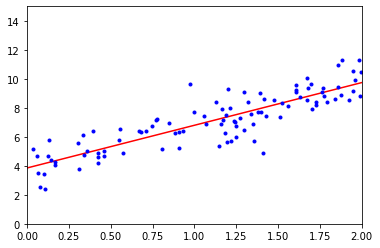

In [159]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])

Scikit-Learn - Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
lr.intercept_, lr.coef_

(array([4.18162664]), array([[2.96431982]]))

In [59]:
lr.predict(X_new)

array([[ 4.18162664],
       [10.11026627]])

Batch Gradient Descent

In [162]:
eta = 0.1 # Learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initializaiton

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients

In [164]:
theta = np.random.randn(2,1)
X_b.dot(theta)

array([[-1.55911867],
       [-1.89552508],
       [-0.13928015],
       [-2.07717204],
       [-1.54888057],
       [-1.41260141],
       [-1.56123327],
       [-2.14348632],
       [-1.46975659],
       [-1.45522297],
       [-2.44999667],
       [-1.8819958 ],
       [-1.11858097],
       [-1.76222062],
       [-0.98974939],
       [-0.60042612],
       [-1.49382995],
       [-2.2982611 ],
       [-2.30058561],
       [-0.87484933],
       [-1.32588255],
       [-0.55857047],
       [-2.46201944],
       [-2.42678307],
       [-1.62167514],
       [-1.99776673],
       [-1.780923  ],
       [-1.48486218],
       [-0.1742659 ],
       [-1.14885798],
       [-1.68304565],
       [-1.68971095],
       [-0.9506414 ],
       [-2.33106153],
       [-0.45106654],
       [-1.25955758],
       [-1.72212893],
       [-1.73730764],
       [-1.61956294],
       [-0.71311087],
       [-0.42399452],
       [-1.58873215],
       [-1.49977885],
       [-0.48019866],
       [-1.75673882],
       [-1

In [166]:
X_b.shape

(100, 2)

In [168]:
theta.shape

(2, 1)

In [169]:
y.shape

(100, 1)

In [170]:
(X_b.dot(theta).shape)

(100, 1)

In [163]:
theta # same result as normal eq

array([[3.84954686],
       [2.94617493]])

In [66]:
X_new_b.dot(theta) # same result as normal equation

array([[ 4.18162664],
       [10.11026627]])

In [71]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

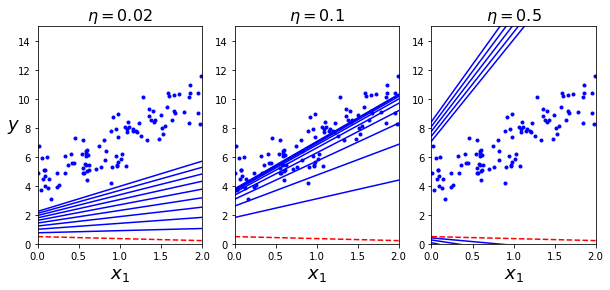

In [72]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

# save_fig("gradient_descent_plot")
plt.show()

Stochastic Gradient Descent

In [138]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [139]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

In [140]:
def learning_schedule(t):
    return t0 / (t0 + t1)

theta = np.random.randn(2,1) # random initialization

In [146]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [149]:
xi.shape

(1, 2)

In [150]:
theta.shape

(2, 1)

Mini Batch Gradient Descent

Regularized Linear Models

Ridge Regression

In [87]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [88]:
from sklearn.linear_model import Ridge 
ridge_reg = Ridge(alpha=1, solver = 'cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

Lasso Regression

In [89]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

Elastic Net

In [90]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42) # l1_ratio specifies hyperparater weight
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Chapter 5 - Support Vector Machines

#### Large Margins vs Margin Violations

In [239]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

## Chapter 8

Build a 3D dataset

In [94]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

PCA

In [97]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]

In [98]:
c1

array([0.93636116, 0.29854881, 0.18465208])

In [99]:
m, n = X.shape

In [100]:
S= np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [101]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

Projecting Down to d Dimensions

In [114]:
W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)
X2D[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

PCA with Scikit-Learn

In [116]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [117]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [118]:
# Recover the 3D points projected on the plane (PCA 2D subspace)
X3D_inv = pca.inverse_transform(X2D)

In [120]:
X3D_inv[:5]

array([[-1.01450604, -0.54656333, -0.27441525],
       [-0.02103231,  0.55108376,  0.18101894],
       [-0.95379477, -0.4668077 , -0.24237013],
       [-0.91717404,  0.22083765, -0.01049779],
       [-0.74607229,  0.22027492,  0.00492637]])

In [123]:
# Compute the reconstruction error
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.01017033779284855

In [124]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [125]:
Vt[:2] # notice signs are flipped

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

Explained Variance Ratio

In [127]:
pca.explained_variance_ratio_
# the first dimension explains 84.2% of the variance
# the second components explains 14.6% 

array([0.84248607, 0.14631839])

In [130]:
1 - pca.explained_variance_ratio_.sum()
# By projecting down to 2D =, we lost about 1.1$ of the variance

0.011195535570688975